# 데이터 가공 및 시각화
- 1. 전처리
    - 결측값 처리: 단순대치, 평균 대치, 단순확률 대치 (Hot-deck, nearest neighbor), 다중 대치, knnImputation, centralimputation
    - 클래스불균형: 업샘플링 (SMOTE, Boaderline SMOTE, Adasyn), 다운샘플링
    - 이상값 처리: 극단값 절단, 조정
    - **변수 변환, 스케일링: 수치형 변수 변환(로그변환, 제곱근변환, 지수변환, 제곱변환, Box-cox 변환, 표준화, 정규화), 범주형 변수 변환(범주형 변수 인코딩, 대규모 범주형 변수처리), 날짜 및 변수 변환,  피쳐스케일링**
    - 원핫인코딩(더미변수), 컬럼 트랜스퍼, 구간분할, 이산화, 피쳐선택
- 2. 표본 추출: 단순랜덤 추출법, 계통추출법, 집락추출법, 층화추출법
- 3. 데이터 분할: 구축/검정/시험용, 홀드아웃방법, 교차확인방법 (10 fold 교차분석), 부트스트랩
- 4. 그래프 그리기:
    - 산점도, 막대그래프, 선그래프, 히트맵, 서브플롯, 트리맵, 도넛차트, 버블차트, 히스토그램, 체르노프 페이스, 스타차트, 다차원척도법, 평행좌표계
    - 도식화와 시각화

## 변수변환 (Feature Scaling)
변수변환이란, feature의 스케일을 바꾸는 feature 정규화를 의미

입력 feature들의 스케일이 서로 크게 다른 상황에서 유용

어떤 수치형 feature들은 무한히 증가하기 때문에 선형회귀나 로지스틱 회귀 등과 같이 입력에 대한 평활 함수인 모델은 입력의 스케일에 영향을 받음

반면, 트리 기반 모델은 입력의 스케일에 그다지 신경 쓰지 않아도 됨

모델이 입력 feature의 스케일에 민감하다면 변수 변환이 도움이 될 수 있음

일반적으로 변수변환은 각 feature에 대해 개별적으로 수행. feature의 유형에 따라 다음과 같은 변수 변환 방법들이 있음.

    - 수치형 변수 변환 (*옆의 괄호는 Scikit Learn의 함수명)
        - 선형변환: 최소최대 스케일링(MinMaxScaler), 표준화(StandardScaler), 로버스트 스케일링(RobustScaler), 균등분포/RankGauss(QuantileTransformer)
        - 비선형변환: 로그변환, 거듭제곱변환(PowerTransformer - Boxcox, YeoJohnson), 정규화(Normalizer - L1, L2, Max)
        - 기타: 구간분할(=이산화, binning), 순위 변환
    - 범주형 변수 변환
        - 원핫인코딩(One-hot-encoding), 더미코딩(dummy coding), 이펙트코딩(Effect coding), 숫자로 표현된 범주형 특성, 레이블인코딩(Label encoding), 특징 해싱(Feature Hashing)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/benny/Desktop/datascience/heart.csv', na_values=['','NA',-1,9999])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         916 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
X = df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]
y = df['HeartDisease']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [11]:
X_train

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
485,63,139,217,128,1.2
486,55,110,214,180,0.4
117,59,130,338,130,1.5
361,47,160,0,124,0.0
296,50,145,0,139,0.7
...,...,...,...,...,...
276,51,135,160,150,2.0
201,46,120,230,150,0.0
462,59,122,233,117,1.3
252,61,125,292,115,0.0


### 수치형 변수의 선형변환 - 1) 최소최대 스케일링 (Min-Max Scaling) with MinMaxScaler

In [12]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train) # 훈련세트에 있는 특성마다 최소값과 최대값을 계산
X_train_scaled = mms.transform(X_train)
# or mms.fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,0.708333,0.435185,0.359867,0.478873,0.463415
1,0.541667,0.166667,0.354892,0.845070,0.365854
2,0.625000,0.351852,0.560531,0.492958,0.500000
3,0.375000,0.629630,0.000000,0.450704,0.317073
4,0.437500,0.490741,0.000000,0.556338,0.402439
...,...,...,...,...,...
729,0.458333,0.398148,0.265340,0.633803,0.560976
730,0.354167,0.259259,0.381426,0.633803,0.317073
731,0.625000,0.277778,0.386401,0.401408,0.475610
732,0.666667,0.305556,0.484245,0.387324,0.317073


In [14]:
# 스케일링 전후 데이터 shape 비교
print(X_train.shape, X_train_scaled_df.shape)

# 스케일링 전 각 열의 min&max vs 스케일링 후 각 열의 min&max
# 스케일링 후 각 열의 값은 0과 1 사이가 되었음
print(X_train.min(axis=0), "\n\n", X_train.max(axis=0), "\n\n",
     X_train_scaled_df.min(axis=0), "\n\n", X_train_scaled_df.max(axis=0), "\n\n",)

(734, 5) (734, 5)
Age            29.0
RestingBP      92.0
Cholesterol     0.0
MaxHR          60.0
Oldpeak        -2.6
dtype: float64 

 Age             77.0
RestingBP      200.0
Cholesterol    603.0
MaxHR          202.0
Oldpeak          5.6
dtype: float64 

 Age            0.0
RestingBP      0.0
Cholesterol    0.0
MaxHR          0.0
Oldpeak        0.0
dtype: float64 

 Age            1.0
RestingBP      1.0
Cholesterol    1.0
MaxHR          1.0
Oldpeak        1.0
dtype: float64 




In [16]:
# 테스트 데이터 변환
X_test_scaled_df = pd.DataFrame(mms.transform(X_test), columns=X_train.columns)
print(X_test_scaled_df.min(axis=0), X_test_scaled_df.max(axis=0))

# MinMaxScaler 및 다른 모든 스케일 모델들은 항상 훈련 세트와 테스트 세트에 같은 변환을 적용해야 함
# 그렇기 때문에 일부 특성은 0~1 범위를 벗어나게 됨.
# transform 메서드는 테스트 세트의 최소값과 범위를 사용하지 않고, 훈련 세트의 최소값을 빼고 훈련 세트의 범위로 나눔

Age           -0.020833
RestingBP     -0.851852
Cholesterol    0.000000
MaxHR          0.140845
Oldpeak        0.304878
dtype: float64 Age            0.958333
RestingBP      0.925926
Cholesterol    0.859038
MaxHR          0.950704
Oldpeak        1.073171
dtype: float64


### 수치형 변수의 선형변환 - 2) 표준화 (Standardization) with StandardScaler

선형회귀나 로지스틱 회귀 등의 선형모델에서는 값의 범위가 큰 변수일 수록 회귀계수가 작아지므로 표준화하지 않으면 그런 변수의 정규화가 어려워짐

신경망에서도 변수들 간의 값의 범위가 크게 차이나는 상태로는 학습이 잘 진행되지 않을 때가 많음

0과 1 이진변수에 대해서는 표준화를 실시하지 않아도 된다.

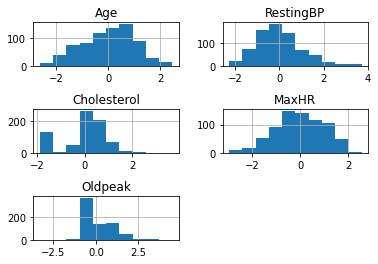

In [24]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
pd.DataFrame(X_train_ss, columns=X_train.columns).hist()
plt.subplots_adjust(hspace=1)
plt.show()

### 수치형 변수의 선형변환 - 3) Robust Scaling with RobustScaler
특성들이 같은 스케일을 같게 된다는 통계적 측면에서는 표준화와 비슷하지만 평균과 분산 대신 중앙값(median)과 사분위수(quantile)을 사용

이 때문에 RobustScaler는 이상치의 영향을 받지 않음. (데이터값-중간값)/(3사분위수 - 1사분위수)로 구함

In [25]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X_train_rs = rs.fit_transform(X_train)
pd.DataFrame(X_train_rs, columns=X_train.columns)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,0.571429,0.428571,-0.089136,-0.270270,0.466667
1,0.000000,-0.952381,-0.122563,1.135135,-0.066667
2,0.285714,0.000000,1.259053,-0.216216,0.666667
3,-0.571429,1.428571,-2.506964,-0.378378,-0.333333
4,-0.357143,0.714286,-2.506964,0.027027,0.133333
...,...,...,...,...,...
729,-0.285714,0.238095,-0.724234,0.324324,1.000000
730,-0.642857,-0.476190,0.055710,0.324324,-0.333333
731,0.285714,-0.380952,0.089136,-0.567568,0.533333
732,0.428571,-0.238095,0.746518,-0.621622,-0.333333


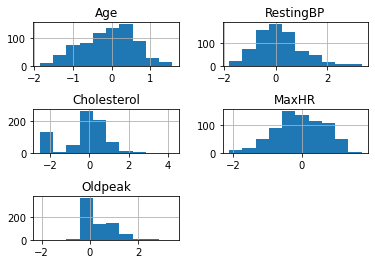

In [26]:
pd.DataFrame(X_train_rs, columns=X_train.columns).hist()
plt.subplots_adjust(hspace=1)
plt.show()

### 수치형 변수의 선형변환 - 4) 균등분포, 정규분포(RankGauss) with QuantileTransformer
Scikit Learn의 QuantileTransformer로 균등분포와 정규분포로의 선형변환이 가능

균등분포는 1000개의 분위를 사용하여 데이터를 균등하게 배포시키는 방법

RobustScaler와 비슷하게 이상치에 민감하지 않으며 전체 데이터를 0과 1사이로 압축

분위수는 n_quantiles 매개변수에서 설정할 수 있으며 기본값은 1000

QuantileTransformer(output_distribution='uniform', n_quantiles=688) 식으로 코드를 작성

여기서 output_distribution을 uniform으로 하면 균등분포가 되고, normal로 하면 정규분포가 됨

RankGauss는 수치형 변수를 순위로 변환한 뒤 순서를 유지한 채 반강제로 정규분포가 되도록 변환하는 방법
신경망에서 모델을 구축할 때의 변환으로서 일반적인 표준화보다 좋은 성능을 나타냄

[[0.83969986 0.62824011 0.44133697 0.38199181 0.66098226]
 [0.51568895 0.08253752 0.4154161  0.96725784 0.47885402]
 [0.68690314 0.46998636 0.95634379 0.40927694 0.73328786]
 ...
 [0.68690314 0.3260573  0.55252387 0.23260573 0.6787176 ]
 [0.7633015  0.3622101  0.85129604 0.20804911 0.22100955]
 [0.1957708  0.68963165 0.49454297 0.60231924 0.22100955]]


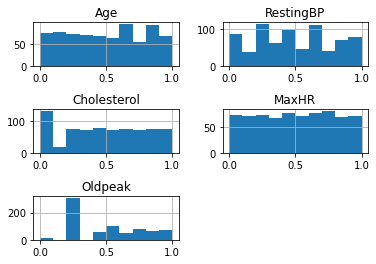

In [27]:
from sklearn.preprocessing import QuantileTransformer

QT = QuantileTransformer(output_distribution='uniform', n_quantiles=734)

X_train_QT = QT.fit_transform(X_train)
print(X_train_QT)

# QuantileTransformer(균등분포): 0~1 사이
pd.DataFrame(X_train_QT, columns=X_train.columns).hist()
plt.subplots_adjust(hspace=1)
plt.show()

[[ 0.99322509  0.32719582 -0.14758038 -0.30025372  0.41514539]
 [ 0.03933651 -1.38820367 -0.21363437  1.84193737 -0.05302994]
 [ 0.48709117 -0.07530416  1.70974837 -0.22940534  0.62278733]
 ...
 [ 0.48709117 -0.4508265   0.13204051 -0.73029242  0.46411577]
 [ 0.71696288 -0.35255752  1.04200812 -0.81320902 -0.76878812]
 [-0.85682499  0.49480652 -0.01367916  0.25935477 -0.76878812]]


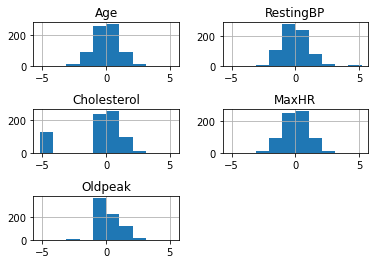

In [29]:
QT2 = QuantileTransformer(output_distribution='normal', n_quantiles=734)

X_train_QT2 = QT2.fit_transform(X_train)
print(X_train_QT2)

# QuantileTransformer(균등분포): -5~5 사이
pd.DataFrame(X_train_QT2, columns=X_train.columns).hist()
plt.subplots_adjust(hspace=1)
plt.show()

### 수치형 변수의 비선형변환 - 1) 로그 변환(Log Scaling) with np.log1p
로그변환은 두꺼운 꼬리분포(heavy-tailed distribution)를 갖는 양수로 된 데이터를 다루는 강력한 도구

분포에서 값이 높은 쪽에 있는 긴 꼬리를 짧게 압축하고, 낮은 값 쪽의 머리가 길어지게 하기 때문

가우시안 분포보다 꼬리 범위에 더 많은 확률 질량을 가짐

Box-cox 변환의 매개변수 람다가 0일 때가 로그 변환임

일반적으로 파이썬으로 로그 변환에 쓰이는 함수는 np.log1p

In [30]:
# 상용로그+1
X_train_log = np.log10(X_train.filter(['Age'])+1) # 리뷰카운트가 0인 경우 음의 무한대가 되는 것을 방지하기 위해 +1
X_train_log

,Age
485,1.806180
486,1.748188
117,1.778151
361,1.681241
296,1.707570
...,...
276,1.716003
201,1.672098
462,1.778151
252,1.792392


In [31]:
X_train_log2 = np.log(X_train.filter(['Age'])) # 자연로그 #box-cox lambda=0
X_train_log3 = np.log1p(X_train.filter(['Age'])) # 자연로그+1
# 절대값 자연로그에 원래 부호붙임 (마이너스인 경우도 사용가능)
X_train_log4 = np.sign(X_train.filter(['Age']))*np.log(np.abs(X_train.filter(['Age'])))

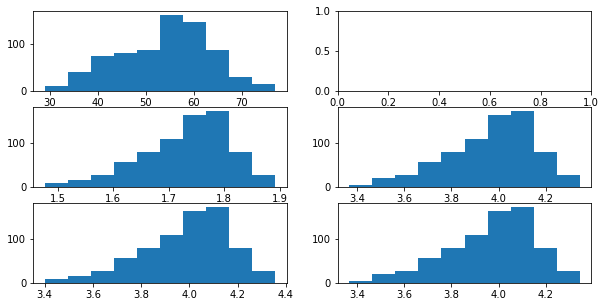

In [35]:
plt.rcParams['figure.figsize'] = (10, 5)
fig, ax = plt.subplots(3, 2)
ax[0][0].hist(pd.DataFrame(X_train['Age']))
ax[1][0].hist(pd.DataFrame(X_train_log))
ax[1][1].hist(pd.DataFrame(X_train_log2))
ax[2][0].hist(pd.DataFrame(X_train_log3))
ax[2][1].hist(pd.DataFrame(X_train_log4))
plt.show()

### 수치형 변수의 비선형변환 - 2) 거듭제곱 변환 with PowerTransformer
거듭제곱 변환은 로그변환을 일반화한 것. 분산 안정화 변환이라고도 한다.

푸아송 분포는 평균과 분산이 동일한 값을 갖는 두꺼운 꼬리 분포로서 질량 중심이 커질 수록 분산도 커지고 꼬리도 굵어진다.

거듭제곱 변환은 분산이 더이상 평균에 의존하지 않도록 변수의 분포를 바꾼다

분포의 평균을 나타내는 람다가 증가할수록 분포의 최빈값이 오른쪽으로 이동할 뿐만 아니라 질량이 점점 퍼지면서 분산도 커진다.

Scikit Learn 패키지의 PowerTransformer 함수를 사용하여 구현한다. method 매개변수에 'yeo-johnson', 'box-cox' 알고리즘을 지정할 수 있다. 기본은 'yeo-johnson'이다.

한편, Scipy의 boxcox 함수를 사용하면 result, params = boxcox(data)를 통해 params에 최적의 파라미터가 할당된다.

    - Box-cox: 주된 용도는 데이터를 정규분포에 가깝게 만들거나 데이터의 분산을 안정화하는 것으로, 정규성을 가정하는 분석법이나 정상성을 요구하는 분석법을 사용하기에 앞서 데이터의 전처리에 사용한다. 데이터가 모두 양수여야 한다는 전제조건이 있다. 보통은 데이터의 최소값이 양수가 되도록 어떤 값을 더해서 밀어주는 식(shift)으로 해결한다. 최대우도법이나 베이지안 기법을 통해 최적의 파라미터 람다의 값을 정할 수도 있다.
     - Yeo-Johnson: Box-cox의 shift 방법이 마음에 들지 않는다면 실수 전체에 대해 일반화된 여-존슨 변환을 고려해볼 수 있다. 이 경우, 데이터가 양수/음수여도 된다.

In [37]:
from scipy.stats import boxcox
result, params = boxcox(X_train['Age'])
params

1.403312313021437

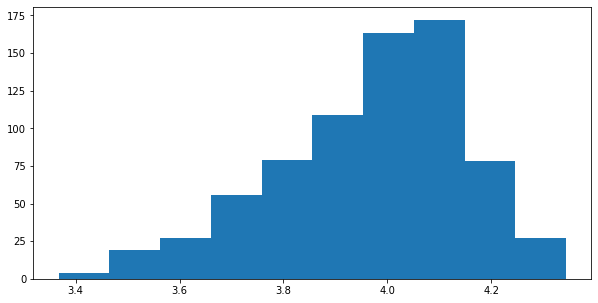

In [39]:
result2 = boxcox(X_train['Age'], lmbda=0) # X_train_log2, 4와 동일 (자연로그변환)
plt.hist(result2)
plt.show()

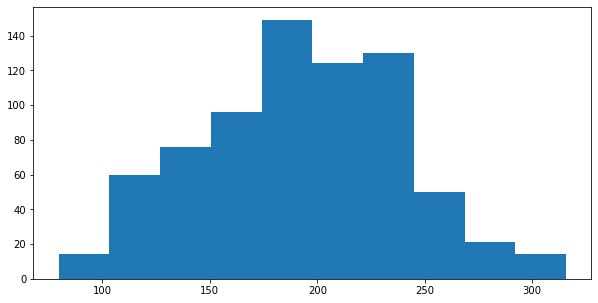

In [40]:
plt.hist(result)
plt.show()

/Users/benny/opt/anaconda3/envs/bennyspace/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


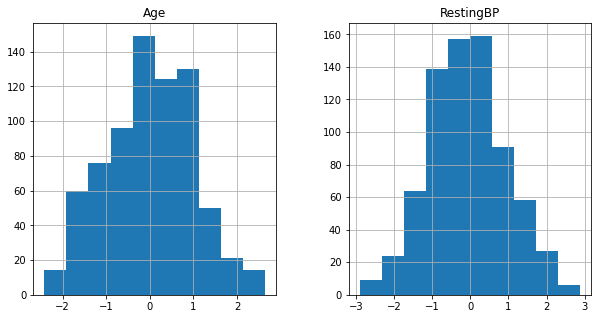

In [44]:
from sklearn.preprocessing import PowerTransformer
PTB = PowerTransformer(method='box-cox')
PTY = PowerTransformer(method='yeo-johnson')

X_train_PTB = PTB.fit_transform(X_train.filter(['Age', 'RestingBP'])) # 양수 데이터
X_train_PTY = PTY.fit_transform(X_train)

pd.DataFrame(X_train_PTB, columns=['Age','RestingBP']).hist()
plt.show()

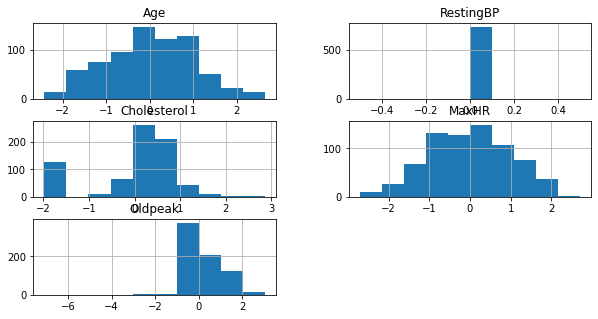

In [45]:
pd.DataFrame(X_train_PTY, columns=X_train.columns).hist()
plt.show()

### 수치형 변수의 비선형변환 - 3) 정규화(Normalizing, Regularization) with normalize

정규화는 머신러닝에서 overfitting을 방지하는 중요한 기법 중 하나로서 모델을 구성하는 coefficient들이 학습 데이터에 overfitting되지 않도록 정규화 요소를 더해 주는 것이다.

Norm 계산의 결과로 나오는 수치는 원점에서 벡터 좌표까지의 거리이며 이를 magnitude라고 부른다.

L1, L2 정규화는 이같은 L1, L2 norm을 사용한 값들을 더해주는 것이다.

따라서 overfitting이 심하게 발생할 수 있는 가능성이 큰 수치에 penalty를 부여한다.

L2는 각 vector에 대해 unique한 값이 출력되는 반면 L1은 경우에 따라 특정 feature없이도 같은 값을 낼 수 있다.

이에 따라 L1 norm은 feature selection에 사용 가능하며 특정 feature들을 0으로 처리해버리는 것이 가능하여 새당 coefficient들이 sparse한 형태를 가질 수 있게 된다.

- ||x||1 = L1 norm: 벡터 간의 거리를 절대값으로 구함 -> 맨해튼 거리, L1 loss: 타겟값과 예측값의 차를 절대값으로 구한 것
- ||x||2 = L2 norm: 벡터 간의 거리 -> 유클리드 거리, L2 loss: 타겟값과 예측값의 차의 제곱


선형 회귀 모델에서 L1 규제를 주는 것이 lasso regression(릿지회귀와 동일하지만 𝐿1 norm을 제약한다는 점이 다름), 선형 회귀 모델에서 L2 규제를 주는 것이 Ridge regression(평균제곱오차를 최소화하면서 회귀계수 벡터 β의 𝐿2 norm을 제한하는 기법)이다.

미래 데이터에 대한 오차의 기대값은 Bias와 Variance로 분해할 수 있는데 정규화는 variance를 감소시켜 일반화 성능을 높이는 기법이다. 이 과정에서 bias가 증가할 수는 있다.

파이썬에서 정규화는  Scikit Learn의 normalize 함수로 구현할 수 있다.

일반적으로 2차원 행렬과 함께 사용되며 L1, L2 정규화 옵션을 제공한다.


norm 매개변수는 L1, L2, Max 세가지 옵션을 제공하며 유클리디안 거리를 의미하는 L2가 기본 값이다.

StandardScaler, MinMaxScaler, RobustScaler는 열의 통계치를 이용하지만, normalize는 행마다 각기 정규화된다.

### 수치형 변수 기타 - 1) 구간분할, 이산화 (Binning) with cut, KBinsDiscretizer
구간분할 혹은 이산화는 수치형 변수를 구간별로 나누어 범주형 변수로 변환하는 방법이다.

구간분할을 하면 순서가 있는 범주형 변수가 되므로 순서를 그대로 수치화할 수도 있고 범주형 변수로서 원핫 인코딩 등을 적용할 수도 있다.

구간의 범주마다 다른 변수값을 집계할 수 있는 범주형 변수로 사용할 수 있다.

같은 간격으로 분할하는 방법, 분위점을 이용하여 분할하는 방법, 구간 구분을 지정하여 분할하는 방법 등이 있다.

pandas의 cut 함수로, 지정한 bins 수만큼 균일한 범위로 데이터를 분할 하거나 지정한 범위대로 데이터를 분할 할 수 있다.

Scikit Learn의 KBinsDiscretizer 함수를 이용하면, 지정한 bins 수대로 데이터를 분할한 후 각 구간 별로 원핫인코딩을 적용할 수 있다.

구간마다 하나의 새로운 특성이 생기므로 희소 행렬이 만들어진다.

In [47]:
binned = pd.cut(X_train['Age'], 5)
binned.value_counts()

(48.2, 57.8]      250
(57.8, 67.4]      234
(38.6, 48.2]      157
(28.952, 38.6]     50
(67.4, 77.0]       43
Name: Age, dtype: int64

In [50]:
# bin의 범위를 지정
bin_edges = [0, 19, 39, 59, float('inf')]
binned2 = pd.cut(X_train['Age'], bin_edges)
binned2.value_counts()

(39.0, 59.0]    457
(59.0, inf]     215
(19.0, 39.0]     62
(0.0, 19.0]       0
Name: Age, dtype: int64

In [51]:
binned2.head(10)

485     (59.0, inf]
486    (39.0, 59.0]
117    (39.0, 59.0]
361    (39.0, 59.0]
296    (39.0, 59.0]
730    (39.0, 59.0]
451     (59.0, inf]
291    (39.0, 59.0]
92     (39.0, 59.0]
765    (39.0, 59.0]
Name: Age, dtype: category
Categories (4, interval[float64, right]): [(0.0, 19.0] < (19.0, 39.0] < (39.0, 59.0] < (59.0, inf]]

In [52]:
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=5, strategy='uniform')
kb.fit(np.array(X_train['Age']).reshape(-1,1))
print(kb.bin_edges_)

[array([29. , 38.6, 48.2, 57.8, 67.4, 77. ])]


In [53]:
X_train['Age'].head(3)

485    63
486    55
117    59
Name: Age, dtype: int64

In [54]:
kbinned = kb.transform(np.array(X_train['Age']).reshape(-1,1))
kbinned.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]])

### 수치형 변수 기타 - 2) 순위로 변환 with rank
수치형 변수를 대소 관계에 따른 순위로 변환하는 방법이다.

단순히 순위로 바꾸는 것 외에, 순위를 행 데이터의 수로 나누면 0부터 1의 범위에 들어가고, 값의 범위가 행 데이터의 수에 의존하지 않으므로 다루기 쉽다.

수치의 크기나 간격 정보를 버리고 대소 관계만을 얻어내는 방법이다.

In [58]:
x = [10, 20, 30, 0, 40, 40]
pd.Series(x).rank() # 랭크 시작은 1, 같은 순위가 있을 경우 평균 순위가 됨 (5+6의 평균)

0    2.0
1    3.0
2    4.0
3    1.0
4    5.5
5    5.5
dtype: float64